# **Video Classification with  Transformers** 🤗

# Dataset 📁

This notebook uses videos in this website  https://sshi.sa/categories.html  to train a model to help individuals with hearing disabilities

 The types of Words available on the website "إشارات السعودية" include the following :🗃️

1. اتجاهات ومواضع (Directions and Positions)
2. الحاسب الآلي (Computer)
3. ادارة واقتصاد ومحاسبة (Management, Economics, and Accounting)
4. صفات وحالات (Attributes and Conditions)
5. أشكال وألوان (Shapes and Colors)
6. تعليم وتدريب (Education and Training)
7. بيئة وطبيعة (Environment and Nature)
8. الفضاء (Space)
9. المنزل (Home)
10. مقاييس وأزمنة (Measurements and Time)
11. الأعداد الترتيبية الوصفية (Ordinal Numbers)
12. صحة ومرض (Health and Illness)
13. باب العلاقات الاجتماعية (Social Relations)
14. الأسرة والمجتمع (Family and Society)
15. باب الضداد (Opposites)
16. الكلمات الشائعة (Common Words)
17. مرور ونقل (Traffic and Transportation)
18. وظائف ومهن (Jobs and Professions)
19. وطني (National)
20. فيديو منوعات (Miscellaneous Videos)
21. باب الدين (Religion and Worship)
22. التربية الاجتماعية (Social Education)
23. الحاسوب (Computers)
24. العلوم (Sciences)
25. رياضيات (Mathematics)
26. الفنية (Art)
27. اللغة العربية (Arabic Language)
28. دول العالم ومدنها (Countries and Cities)
29. التربية الأسرية (Family Education)
30. الرياضة والفنون (Sports and Arts)


We've got 587 unique classes.

# Model

" VideoMAE model, which was pre-trained on the Kinetics 400 dataset "


I'll fine-tune it .

 https://huggingface.co/models?search=videomae

In [ ]:
!nvidia-smi

Wed Oct  4 07:09:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Install the 'accelerate' library and upgrade it to the latest version
!pip install accelerate -U

# Install the 'transformers' library with support for PyTorch
!pip install transformers[torch]

# Install the 'pytorchvideo' library along with 'transformers' and 'evaluate' modules
!pip install pytorchvideo transformers evaluate -q

# Configure Git
!git config --global credential.helper store

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
# Import necessary libraries
from google.colab import drive
from huggingface_hub import notebook_login
import pathlib
from transformers import VideoMAEImageProcessor, VideoMAEForVideoClassification
import pytorchvideo.data
import os
from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    Resize,
    CenterCrop,
)
import imageio
import numpy as np
from IPython.display import Image
from transformers import TrainingArguments, Trainer
import torch
import evaluate
from IPython.display import FileLink

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/dataset14.zip" -d "/content/drive/MyDrive/"

Archive:  /content/drive/MyDrive/dataset14.zip
   creating: /content/drive/MyDrive/dataset14/
   creating: /content/drive/MyDrive/dataset14/test/
   creating: /content/drive/MyDrive/dataset14/test/كراهية/
  inflating: /content/drive/MyDrive/dataset14/test/كراهية/كراهية_0_transformed_downsampled.mp4  
   creating: /content/drive/MyDrive/dataset14/test/كل عام و انت بخير/
  inflating: /content/drive/MyDrive/dataset14/test/كل عام و انت بخير/كل عام و انت بخير_0_transformed_downsampled.mp4  
   creating: /content/drive/MyDrive/dataset14/test/كوكب/
  inflating: /content/drive/MyDrive/dataset14/test/كوكب/كوكب_0_transformed_downsampled.mp4  
   creating: /content/drive/MyDrive/dataset14/test/كيلو غرام - ك غ/
  inflating: /content/drive/MyDrive/dataset14/test/كيلو غرام - ك غ/كيلو غرام - ك غ_0_transformed_downsampled.mp4  
   creating: /content/drive/MyDrive/dataset14/test/كيلو متر/
  inflating: /content/drive/MyDrive/dataset14/test/كيلو متر/كيلو متر_0_transformed_downsampled.mp4  
   creating: /

In [ ]:
# Authenticate and log in to Hugging Face Hub from the notebook
notebook_login()

In [ ]:
# Set the maximum memory fraction for each split
max_split_size_mb = 1024  # Adjust this value as needed

# Set the maximum memory fraction using the set_per_process_memory_fraction function
torch.cuda.set_per_process_memory_fraction(max_split_size_mb / 1024)

In [ ]:
dataset_root_path = "/content/drive/MyDrive/dataset14"

!find {dataset_root_path} | head -10

/content/drive/MyDrive/dataset14
/content/drive/MyDrive/dataset14/test
/content/drive/MyDrive/dataset14/test/كراهية
/content/drive/MyDrive/dataset14/test/كراهية/كراهية_0_transformed_downsampled.mp4
/content/drive/MyDrive/dataset14/test/كل عام و انت بخير
/content/drive/MyDrive/dataset14/test/كل عام و انت بخير/كل عام و انت بخير_0_transformed_downsampled.mp4
/content/drive/MyDrive/dataset14/test/كوكب
/content/drive/MyDrive/dataset14/test/كوكب/كوكب_0_transformed_downsampled.mp4
/content/drive/MyDrive/dataset14/test/كيلو غرام - ك غ
/content/drive/MyDrive/dataset14/test/كيلو غرام - ك غ/كيلو غرام - ك غ_0_transformed_downsampled.mp4


In [ ]:
dataset_root_path = pathlib.Path(dataset_root_path)
video_total = len(list(dataset_root_path.glob("train/*/*.mp4")))
print(f"Total videos: {video_total}")

Total videos: 118


In [ ]:
all_video_file_paths = (
    list(dataset_root_path.glob("train/*/*.mp4"))

)
all_video_file_paths[:5]

[PosixPath('/content/drive/MyDrive/dataset14/train/كراهية/كراهية_0.mp4'),
 PosixPath('/content/drive/MyDrive/dataset14/train/كراهية/كراهية_0_transformedInvertColor.mp4'),
 PosixPath('/content/drive/MyDrive/dataset14/train/كراهية/كراهية_0_transformed_Multiply.mp4'),
 PosixPath('/content/drive/MyDrive/dataset14/train/كل عام و انت بخير/كل عام و انت بخير_0.mp4'),
 PosixPath('/content/drive/MyDrive/dataset14/train/كل عام و انت بخير/كل عام و انت بخير_0_transformedInvertColor.mp4')]

In [ ]:
class_labels = sorted({str(path).split("/")[6] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")

Unique classes: ['كراهية', 'كل عام و انت بخير', 'كوكب', 'كيلو غرام - ك غ', 'كيلو متر', 'لتر - ل', 'لصق', 'لون', 'مارس', 'مايو', 'مبروك المولود', 'مبروك النجاح', 'مبكرا', 'متأخر', 'متر -م', 'متر مربع - م2', 'متر مكعب', 'مثلث', 'مجرة', 'محرم - يناير', 'مذهول', 'مرح', 'مركبة فضائية', 'مساء الخير', 'مشغول', 'مصمم', 'معين', 'مقابل', 'مكة المكرمة', 'ملاحظة', 'ملليمتر - مم', 'مليتر - مل', 'مؤشر', 'ميل', 'ميلادي', 'نادي الاتحاد', 'نادي الاتفاق', 'نادي التعاون', 'نادي التهامي', 'نادي أحد'].


# Loading the model

 initialize a video classification model where the encoder is initialized with the pre-trained parameters and the classification head is randomly initialized.  also initialize the feature extractor associated to the model.

In [ ]:
# pre-trained model from which to fine-tune
model_ckpt = "MCG-NJU/videomae-base"

In [ ]:
image_processor = VideoMAEImageProcessor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,
)

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-SLT-subset"
batch_size = 2
num_epochs = 16

# Preprocessing

use the `image_processor` associated with the pre-trained model to obtain the following information:

* Image mean and standard deviation with which the video frame pixels will be normalized.
* Spatial resolution to which the video frames will be resized.

In [ ]:
# Define the root path of the validation dataset
val_dataset_root_path="/content/drive/MyDrive/dataset14"

# Get the mean and standard deviation values from the image processor
mean = image_processor.image_mean
std = image_processor.image_std

# Determine the dimensions for resizing the images
if "shortest_edge" in image_processor.size:
    height = width = image_processor.size["shortest_edge"]
else:
    height = image_processor.size["height"]
    width = image_processor.size["width"]

# Set the dimensions to resize the images
resize_to = (height, width)


# Define the number of frames to sample from the video
num_frames_to_sample = model.config.num_frames

# Set the sample rate, frames per second, and clip duration for video processing
sample_rate = 4
fps = 30
clip_duration = num_frames_to_sample * sample_rate / fps


In [ ]:
# Training dataset transformations.
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=320, max_size=384) ,
                    Resize(size=(224,224)),

                ]
            ),
        ),
    ]
)

# Training dataset.
train_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "train"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)

# Validation  datasets' transformations.
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize(resize_to),
                ]
            ),
        ),
    ]
)

# Validation  datasets.
val_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "val"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)
test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "test"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)


In [ ]:
sample_video = next(iter(train_dataset))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
sample_video.keys()

dict_keys(['video', 'video_name', 'video_index', 'clip_index', 'aug_index', 'label'])

In [ ]:
# Utility to investigate the keys present in a single video sample.
def investigate_video(sample_video):

    for k in sample_video:
        if k == "video":
            print(k, sample_video["video"].shape)
        else:
            print(k, sample_video[k])

    print(f"Video label: {id2label[sample_video[k]]}")


investigate_video(sample_video)

video torch.Size([3, 16, 224, 224])
video_name مذهول_0.mp4
video_index 60
clip_index 0
aug_index 0
label 20
Video label: مذهول


In [ ]:
#  Un-normalizes the image pixels
def unnormalize_img(img):
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)

# Prepares a GIF from a video tensor
def create_gif(video_tensor, filename="sample.gif"):

    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename

# Prepares and displays a GIF from a video tensor
def display_gif(video_tensor, gif_name="sample.gif"):

    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

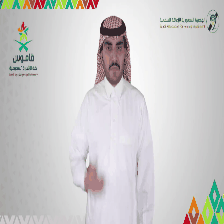

In [ ]:
video_tensor = sample_video["video"]
display_gif(video_tensor)

### Training the model

In [ ]:
args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // batch_size) * num_epochs,
)

In [ ]:
metric = evaluate.load("accuracy")

In [ ]:
'''The compute_metrics function expects an input of a Named Tuple containing predictions and label_ids.
The predictions are represented as Numpy arrays and refer to the model's logits,
while the label_ids are also Numpy arrays and represent the ground-truth labels'''
# Computes accuracy on a batch of predictions
def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
'''This is the collation function used by the `Trainer` to prepare data batches'''
def collate_fn(examples):
    # permute to (num_frames, num_channels, height, width)
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

finetune model

In [ ]:
train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
0,3.860300,3.714749,0.025000
1,3.774700,3.698364,0.050000
2,3.830000,3.541759,0.075000
3,3.506500,3.391677,0.075000
4,3.654100,3.355753,0.100000
5,3.541900,3.246021,0.150000
6,3.266400,3.060266,0.200000
7,3.229500,2.796677,0.425000
8,2.829000,2.374343,0.625000
9,2.576900,1.934861,0.675000


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

In [ ]:
torch.cuda.empty_cache()

In [ ]:
trainer.state.log_history

[{'loss': 3.6031,
  'learning_rate': 5.263157894736842e-06,
  'epoch': 0.01,
  'step': 10},
 {'loss': 3.7725,
  'learning_rate': 1.0526315789473684e-05,
  'epoch': 0.02,
  'step': 20},
 {'loss': 3.8248,
  'learning_rate': 1.5789473684210526e-05,
  'epoch': 0.03,
  'step': 30},
 {'loss': 3.8718,
  'learning_rate': 2.105263157894737e-05,
  'epoch': 0.04,
  'step': 40},
 {'loss': 3.8603,
  'learning_rate': 2.6315789473684212e-05,
  'epoch': 0.05,
  'step': 50},
 {'eval_loss': 3.7147488594055176,
  'eval_accuracy': 0.025,
  'eval_runtime': 53.4878,
  'eval_samples_per_second': 0.748,
  'eval_steps_per_second': 0.374,
  'epoch': 0.06,
  'step': 59},
 {'loss': 3.8286,
  'learning_rate': 3.157894736842105e-05,
  'epoch': 1.0,
  'step': 60},
 {'loss': 3.9212,
  'learning_rate': 3.6842105263157895e-05,
  'epoch': 1.01,
  'step': 70},
 {'loss': 3.777,
  'learning_rate': 4.210526315789474e-05,
  'epoch': 1.02,
  'step': 80},
 {'loss': 3.8516,
  'learning_rate': 4.736842105263158e-05,
  'epoch': 1

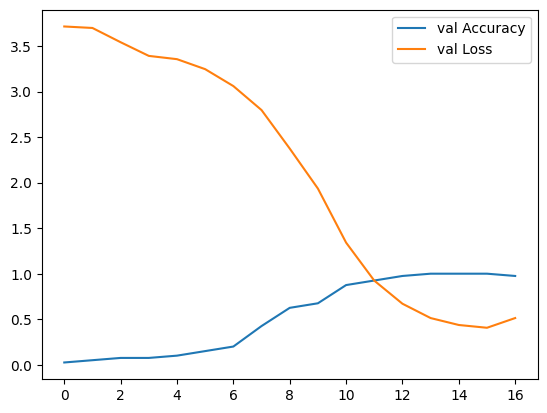

In [ ]:
# Extract train losses
eval_acc = [x['eval_accuracy'] for x in log_history if 'eval_accuracy' in x]

# Extract eval losses
eval_losses = [x['eval_loss'] for x in log_history if 'eval_loss' in x]

# Plot
plt.plot(eval_acc, label='val Accuracy')
plt.plot(eval_losses, label='val Loss')
plt.legend()
plt.savefig('eval_curve.png')

In [ ]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.5129191875457764,
 'eval_accuracy': 0.975,
 'eval_runtime': 50.7439,
 'eval_samples_per_second': 0.788,
 'eval_steps_per_second': 0.394,
 'epoch': 15.06}

In [ ]:
output_dir = "/content/drive/MyDrive/all_models/model14"

# Save the fine-tuned model
trainer.save_model(output_dir)

In [ ]:
trainer.save_model()
test_results = trainer.evaluate(test_dataset)
trainer.log_metrics("test", test_results)
trainer.save_metrics("test", test_results)
trainer.save_state()

In [ ]:
trained_model = VideoMAEForVideoClassification.from_pretrained(output_dir)

In [ ]:
sample_test_video = next(iter(test_dataset))
investigate_video(sample_test_video)

video torch.Size([3, 16, 224, 224])
video_name معين_0_transformed_downsampled.mp4
video_index 26
clip_index 0
aug_index 0
label 26
Video label: معين


In [ ]:
def run_inference(model, video):

    perumuted_sample_test_video = video.permute(1, 0, 2, 3)

    inputs = {
        "pixel_values": perumuted_sample_test_video.unsqueeze(0),
        "labels": torch.tensor(
            [sample_test_video["label"]]
        ),
    }
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    model = model.to(device)


    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    return logits
logits = run_inference(trained_model, sample_test_video["video"])

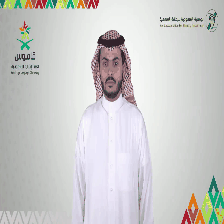

In [ ]:
display_gif(sample_test_video["video"])

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: معين
